# Regression

-----------------

## Exercise - Use simple linear regression on the `Auto` data set.

1. Use `statsmodels` or `scikit-learn` to perform a simple linear regression with
`mpg` as the response and `horsepower` as the predictor. Print the results. Comment on the output.
For example:
    - Is there a relationship between the predictor and the response?
    - How strong is the relationship between the predictor and the response?
    - Is the relationship between the predictor and the response positive or negative?
    - What is the predicted `mpg` associated with a `horsepower` of 98? *Optional: What are the associated 95% confidence and prediction intervals?*

2. Plot the response and the predictor. Plot the least squares regression line.

3. Produce [diagnostic plots](http://data.library.virginia.edu/diagnostic-plots/) of the least squares regression fit. Comment on any problems you see with the fit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


1) Use statsmodels or scikit-learn to perform a simple linear regression with mpg as the response and horsepower as the predictor. Print the results. Comment on the output. For example:

In [2]:
df=pd.read_csv('Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.corr()
#The highest correlations with mpg have the informations about displacement, weight, cylinders and horsepower.

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [4]:
#Let's divide the dataset to response and predictor
X=df['horsepower'].values
y=df['mpg'].values

In [5]:
lm=sm.OLS.from_formula('mpg ~ horsepower ', df)
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           7.03e-81
Time:                        20:35:04   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000        38.525    41.347
horsepower    -0.1578      0.006    -24.489      0.000        -0.171    -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# 1. Is there a relationship between the predictor and the response?
# 2. How strong is the relationship between the predictor and the response?
# 3. Is the relationship between the predictor and the response positive or negative?
# 4. What is the predicted mpg associated with a horsepower of 98? Optional: What are the associated 95% confidence and prediction intervals?
print(" The p-value of the factor 'horsepower is {:.3f}" .format(result.pvalues[1]))
print(" If the pvalue is close to zero, there is a realtionship between the response and the predictor.")      
print(" The relationship betwen the response and the predictor is moderate, the R^2 is {:.3f} ." .format(result.rsquared))

print(" The coefficient of the factor 'horsepower' is {:.3f},the relationship between the factor and 'mpg' is negative." .format(result.params[1]))

 The p-value of the factor 'horsepower is 0.000
 If the pvalue is close to zero, there is a realtionship between the response and the predictor.
 The relationship betwen the response and the predictor is moderate, the R^2 is 0.606 .
 The coefficient of the factor 'horsepower' is -0.158,the relationship between the factor and 'mpg' is negative.


In [7]:
hp_new = pd.DataFrame({"horsepower": np.linspace(98, 98, 1)})
print(" The predicted mpg associated with a horsepower of {} is {:.3f}." .format(hp_new.values[0][0], result.predict(hp_new)[0]))


 The predicted mpg associated with a horsepower of 98.0 is 24.467.


In [8]:
#What are the associated 95% confidence and prediction intervals?
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2=summary_table(result, alpha=0.05)

predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

2) Plot the response and the predictor. Plot the least squares regression line.

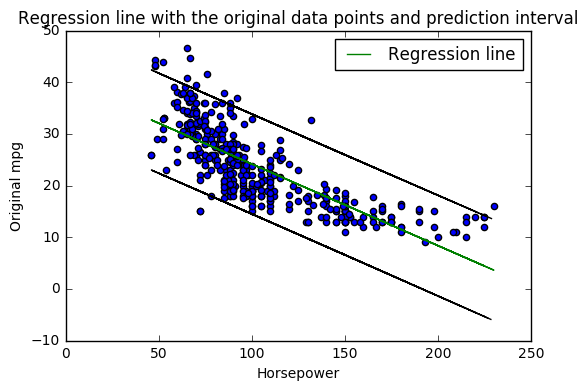

In [9]:
#plot  the regression line with the original data points
plt.scatter(X,y)
plt.xlabel('Horsepower')
plt.ylabel('Original mpg')
plt.plot(X, result.fittedvalues, 'g', label='Regression line')
#plt.plot(X, predict_mean_ci_low, 'r--')
#plt.plot(X, predict_mean_ci_upp, 'r--')
plt.plot(X, predict_ci_low, 'k--')
plt.plot(X, predict_ci_upp, 'k--')

plt.title("Regression line with the original data points and prediction interval")
plt.legend()

3) Produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

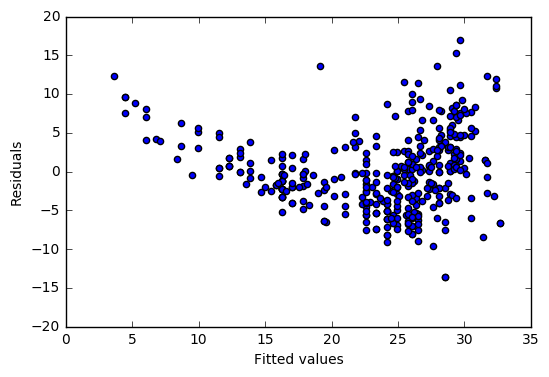

In [10]:
resid=data[:,8]
plt.scatter(result.fittedvalues,resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
#The residulas show a pattern, it looks like there is not a linear but a second degree relation between mpg and horsepower

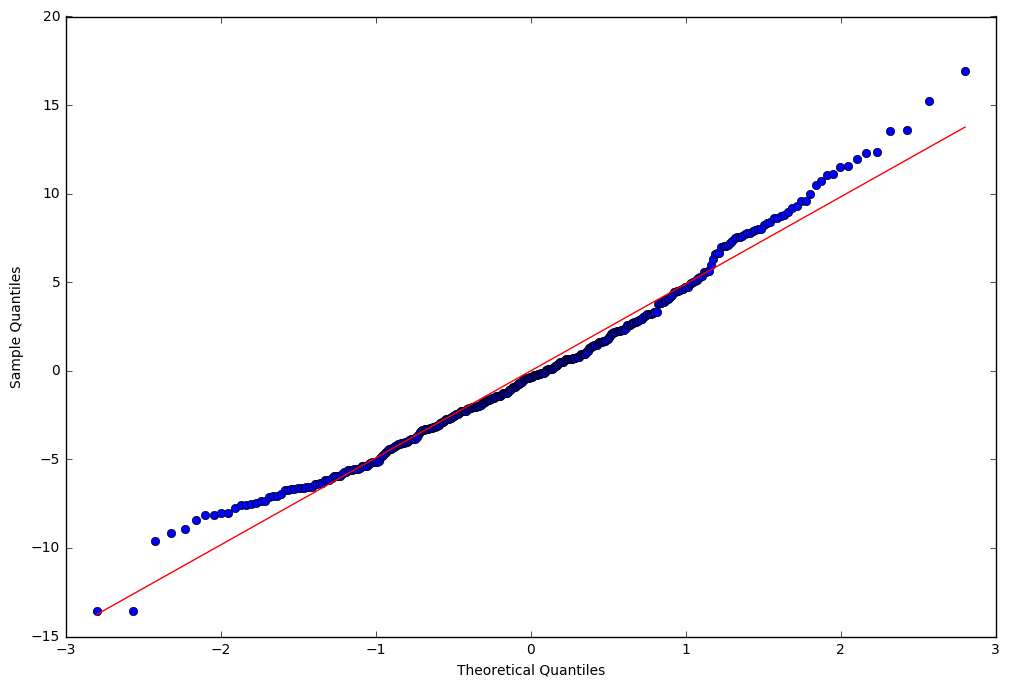

In [11]:
import statsmodels.api as sm
fig, ax=plt.subplots(figsize=(12,8))
fig=sm.qqplot(result.resid, line='r', ax=ax)

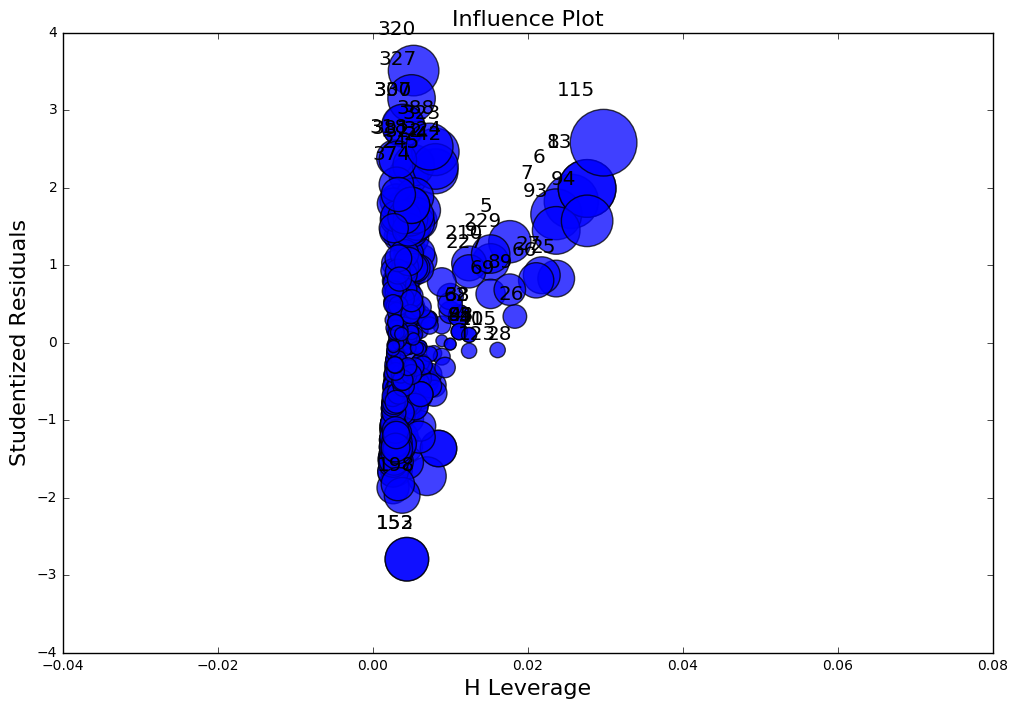

In [12]:
fig, ax=plt.subplots(figsize=(12,8))
fig=sm.graphics.influence_plot(result, ax=ax)
#there ara a couple of outliers, which has greater standardized residuals:e.g.observation nr 320 or 327 has a large standardized residual but a low levarage. 
#There are also couple of mediam leverage points e.g.Observation 115

## Exercise - Use multiple linear regression on the `Auto` data set.

1. Produce a scatterplot matrix which includes all of the variables
in the data set.

2. Compute the matrix of correlations between the variables using
the function corr(). Plot a matrix correlation heatmap as well.

3. Perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Print the results. Comment on the output. For instance:
    - Is there a relationship between the predictors and the response?
    - Which predictors appear to have a statistically significant relationship to the response?
    - What does the coefficient for the year variable suggest?
4. Produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?

5. Use the - and + symbols to fit linear regression models with
interaction effects. Do any interactions appear to be statistically
significant?

6. Try a few different transformations of the variables, such as
$log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

In [13]:
#fig, ax= plt.subplots(figsize=(12,8))

1) Produce a scatterplot matrix which includes all of the variables in the data set.

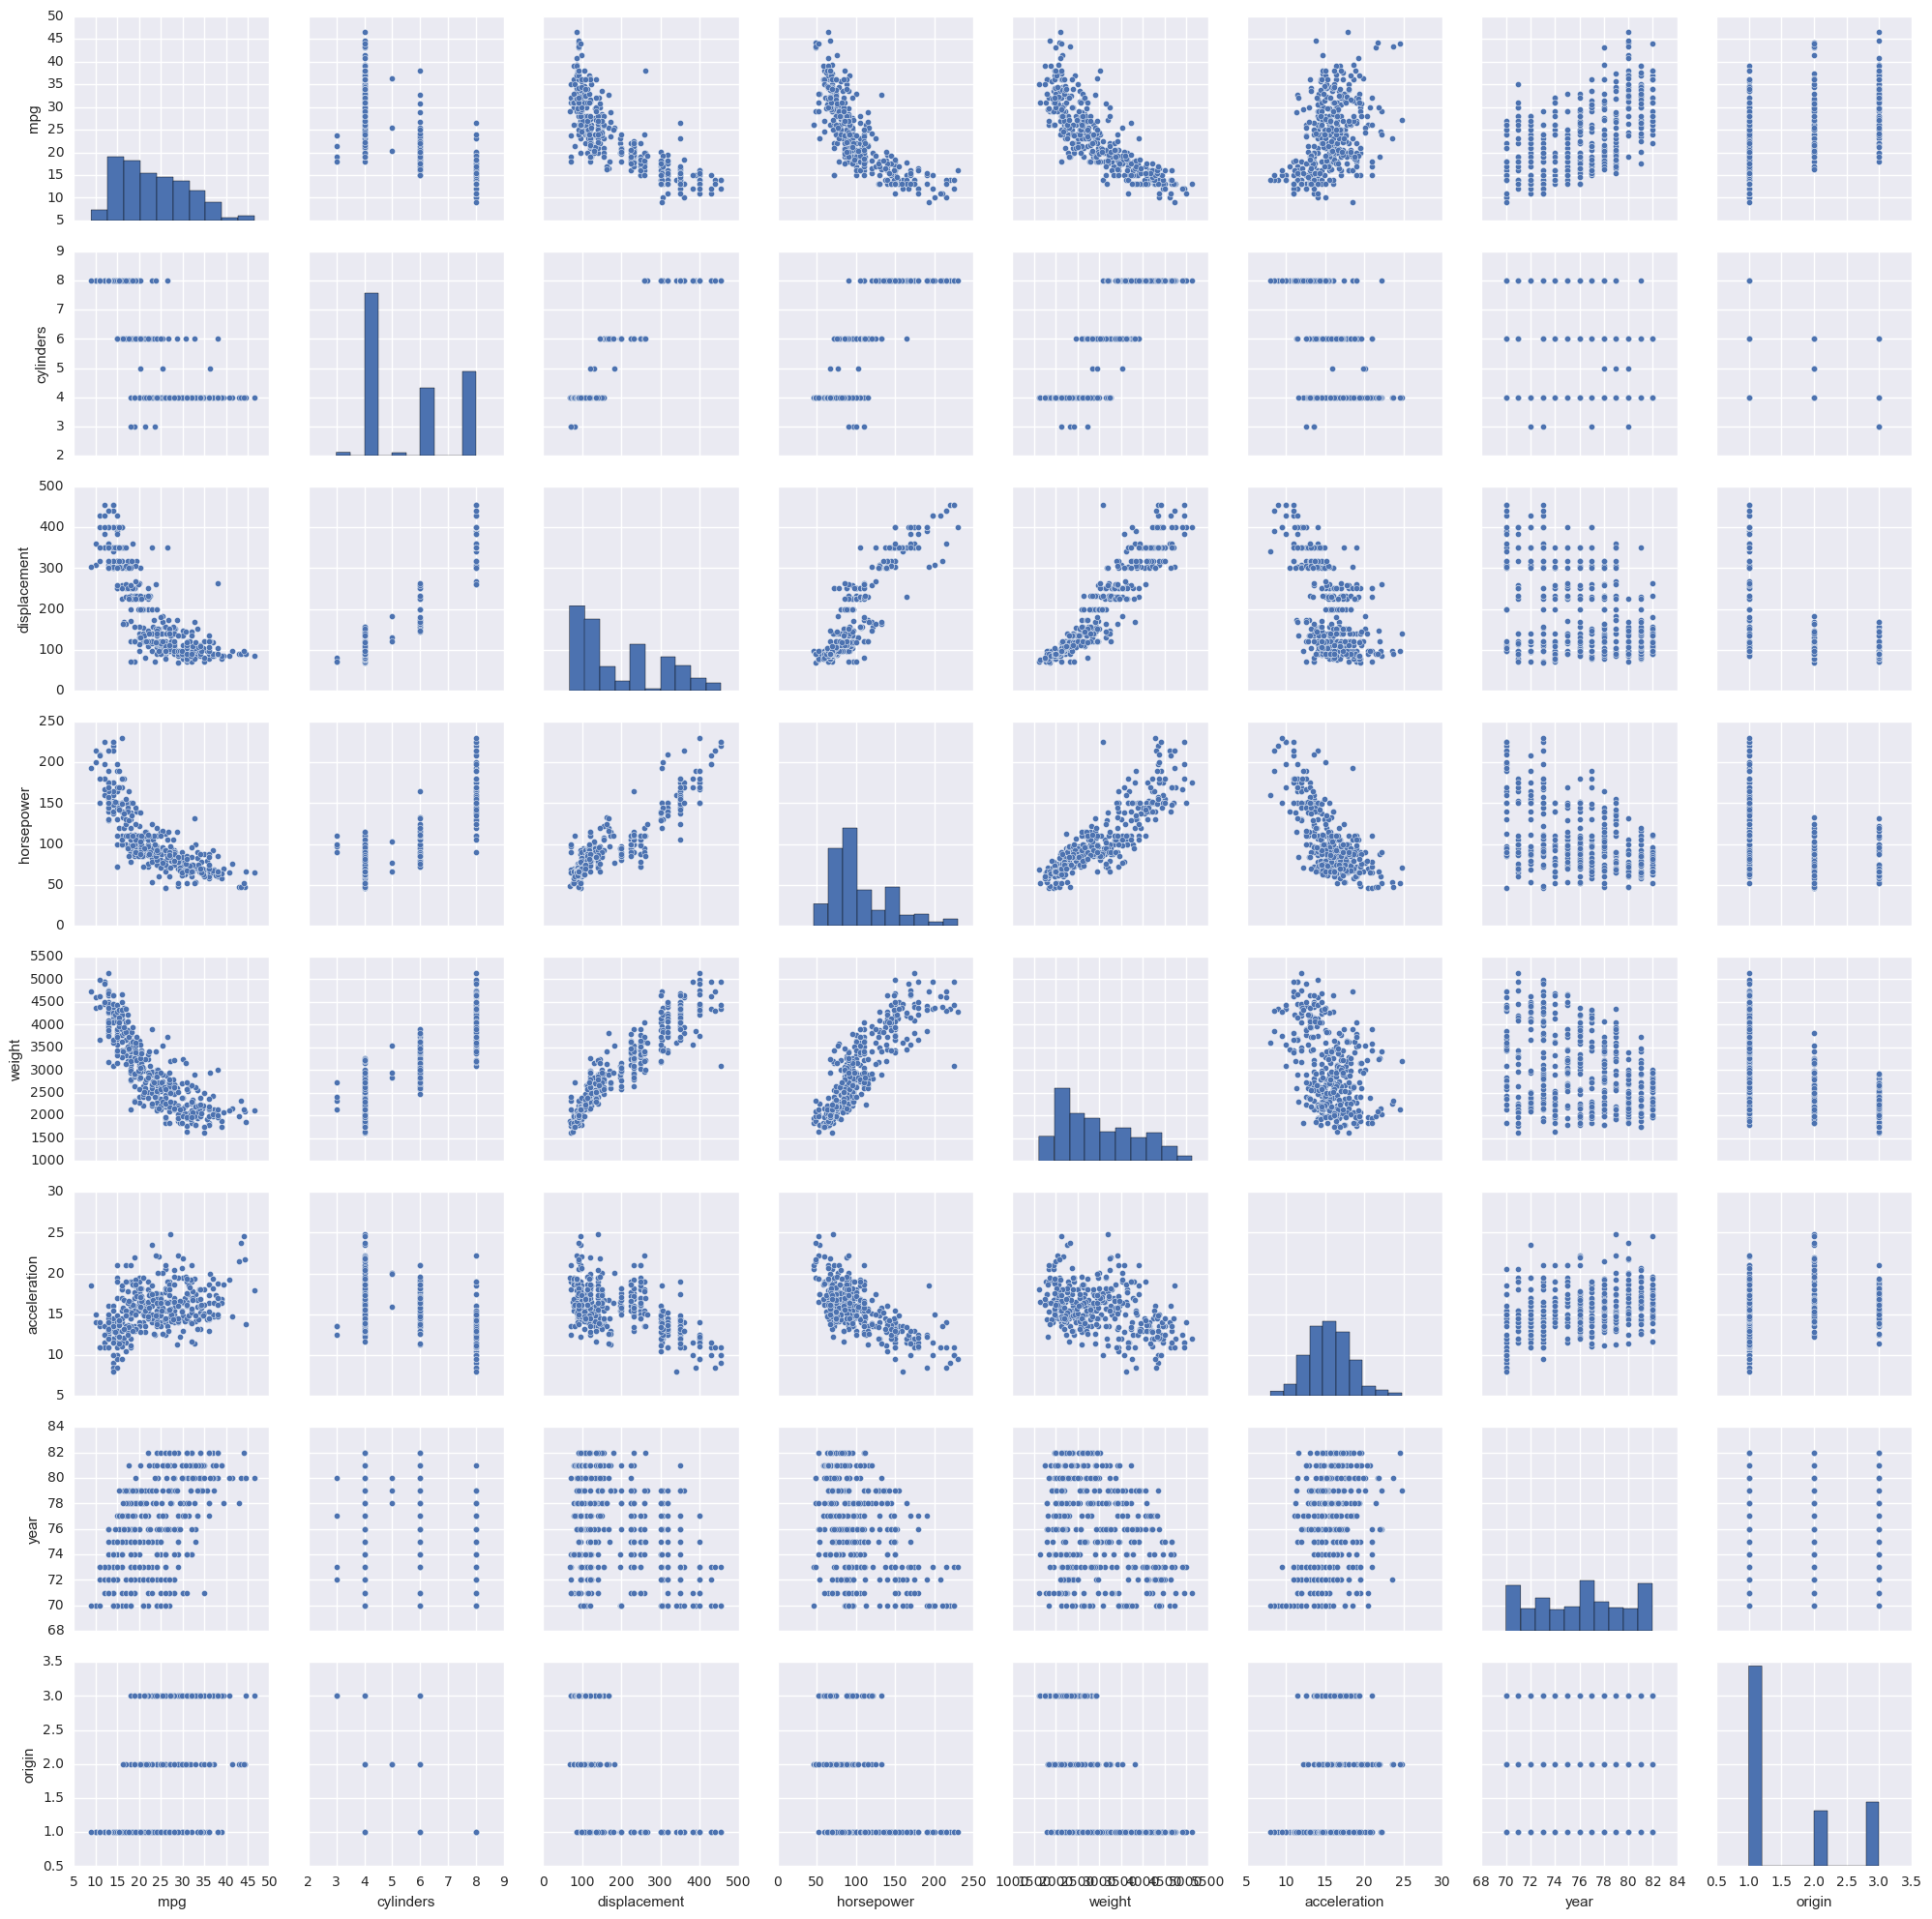

In [14]:
import seaborn as sns
sns.pairplot(df)

2) Compute the matrix of correlations between the variables using the function corr(). Plot a matrix correlation heatmap as well.

In [15]:
corr_matrix=df.corr()

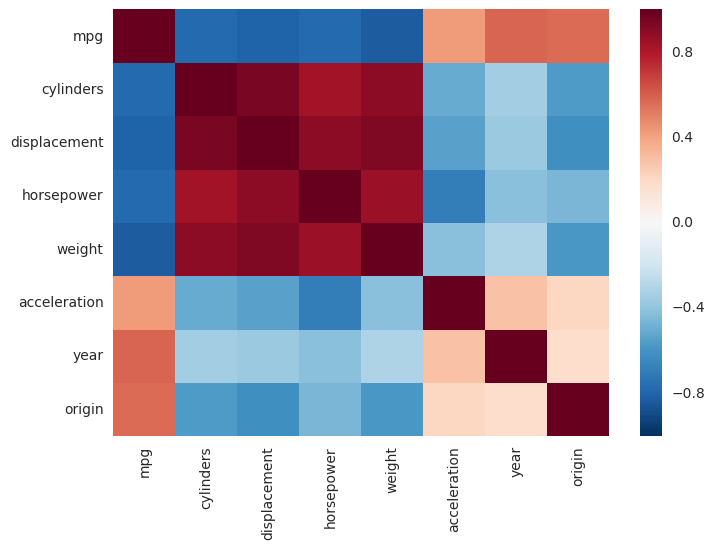

In [16]:
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

3) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Print the results. Comment on the output.

In [17]:
model=sm.OLS.from_formula('mpg~'+ '+'.join(df.columns.difference(['name', 'mpg'])), df)
result=model.fit()

In [18]:
result.summary()
#F statistics is close to 0, 
#there are 3 variables, which doesnt look significant: acceleration, cylinders and horsepower have a pvalue larger than 5%.
#The R2 is 8,21, which is a good fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 11 Jul 2017   Prob (F-statistic):          2.04e-139
Time:                        20:35:17   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000       -26.350    -8.087
acceleration     0.0806      0.099      0.815      0.415        -0.114     0.275
cylinders       -0.4934      0.323     -1.526      0.128        -1.129     0.142
displacement     0.0199      0.008      2.647      0.008         0.005     0.035
horsepower      -0.0170      0.014     -1.230      0.220        -0.044     0.010
origin           1.4261      0.278      5.127      0.000         0.879     1.973
weight          -0.0065      0.001     -9.929      0.000        -0.008    -0.005
year             0.7508      0.051     14.729      0.000         0.651     0.851
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

4) Produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

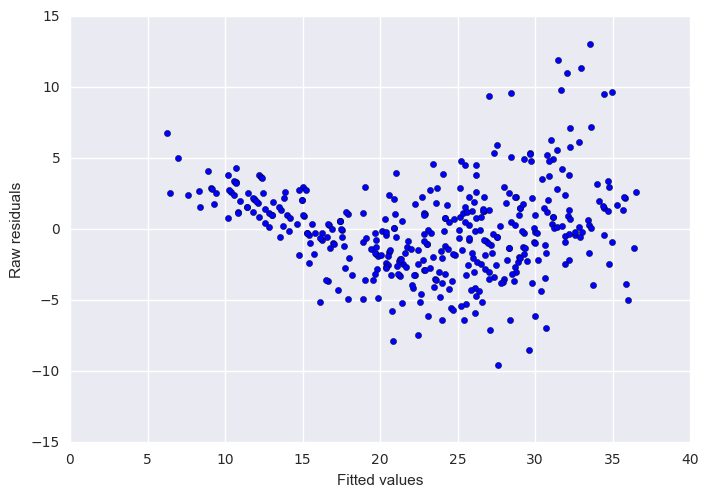

In [19]:
plt.scatter(result.fittedvalues,result.resid)
plt.xlabel('Fitted values')
plt.ylabel('Raw residuals')
#The residulas show a pattern, it gets wider when the fitted value is larger

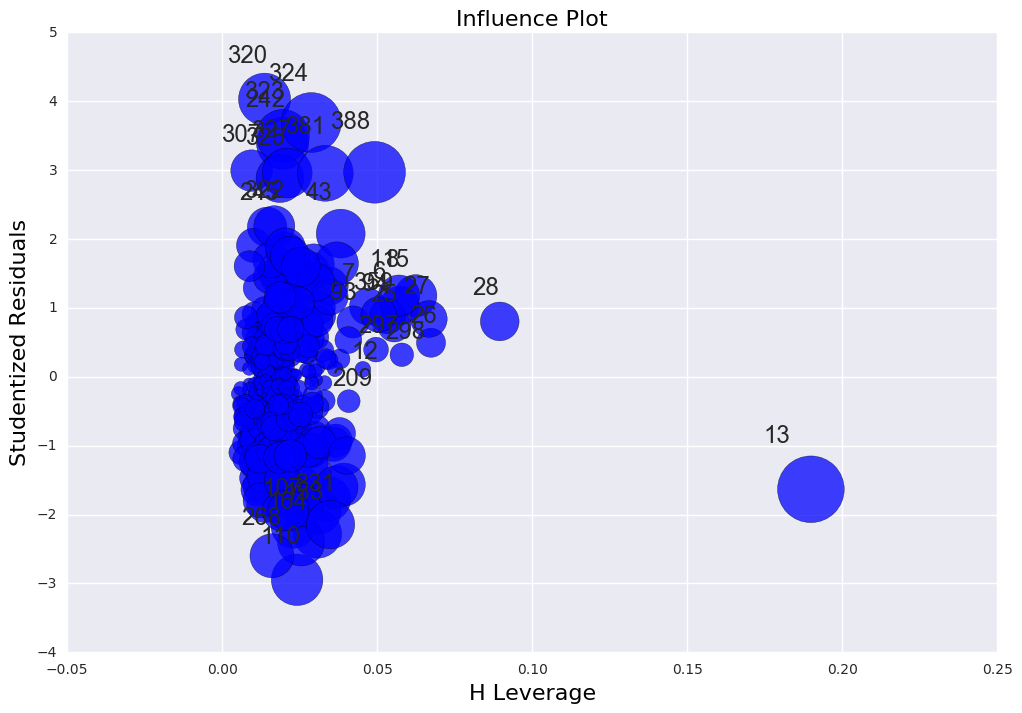

In [20]:
fig, ax=plt.subplots(figsize=(12,8))
fig=sm.graphics.influence_plot(result, ax=ax)
#there are some outliers with std. residuals larger then 3
#there is one observation with high leverage (obs 13)

5) Use the - and + symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [21]:
from itertools import combinations
formula_new='+'. join([comb[0]+'*'+comb[1] for comb in combinations(df.columns.difference(['name', 'mpg']),2)])
formula_new

'acceleration*cylinders+acceleration*displacement+acceleration*horsepower+acceleration*origin+acceleration*weight+acceleration*year+cylinders*displacement+cylinders*horsepower+cylinders*origin+cylinders*weight+cylinders*year+displacement*horsepower+displacement*origin+displacement*weight+displacement*year+horsepower*origin+horsepower*weight+horsepower*year+origin*weight+origin*year+weight*year'

In [22]:
model_new=sm.OLS.from_formula('mpg~'+ formula_new, df)
result_new=model_new.fit()

In [23]:
result_new.summary()
#there are only 3 significant interactions: acceleration:origin ; acceleration:year and displacement:year.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Tue, 11 Jul 2017   Prob (F-statistic):          4.01e-155
Time:                        20:35:19   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505       -69.014   139.972
acceleration                 -5.8592      2.174     -2.696      0.007       -10.134    -1.585
cylinders                     6.9886      8.248      0.847      0.397        -9.231    23.208
acceleration:cylinders        0.2779      0.166      1.670      0.096        -0.049     0.605
displacement                 -0.4785      0.189     -2.527      0.012        -0.851    -0.106
acceleration:displacement    -0.0035      0.003     -1.041      0.299        -0.010     0.003
horsepower                    0.5034      0.347      1.451      0.148        -0.179     1.186
acceleration:horsepower      -0.0072      0.004     -1.939      0.053        -0.015     0.000
origin                      -20.8956      7.097     -2.944      0.003       -34.852    -6.939
acceleration:origin           0.4583      0.157      2.926      0.004         0.150     0.766
weight                        0.0041      0.018      0.235      0.814        -0.030     0.039
acceleration:weight           0.0002      0.000      1.025      0.306        -0.000     0.001
year                          0.6974      0.610      1.144      0.253        -0.501     1.896
acceleration:year             0.0556      0.026      2.174      0.030         0.005     0.106
cylinders:displacement       -0.0034      0.006     -0.524      0.601        -0.016     0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632        -0.036     0.059
cylinders:origin              0.4022      0.493      0.816      0.415        -0.567     1.371
cylinders:weight              0.0004      0.001      0.399      0.690        -0.001     0.002
cylinders:year               -0.1741      0.097     -1.793      0.074        -0.365     0.017
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769        -0.001     0.000
displacement:origin           0.0240      0.019      1.232      0.219        -0.014     0.062
displacement:weight        2.472e-05   1.47e-05      1.682      0.093     -4.18e-06  5.36e-05
displacement:year             0.0059      0.002      2.482      0.014         0.001     0.011
horsepower:origin             0.0022      0.029      0.076      0.939        -0.055     0.060
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501     -7.72e-05  3.78e-05
horsepower:year              -0.0058      0.004     -1.482      0.139        -0.014     0.002
origin:weight                -0.0006      0.002     -0.364      0.716        -0.004     0.003
origin:year                   0.1393      0.074      1.882      0.061        -0.006     0.285
weight:year                  -0.0002      0.000     -1.056      0.292        -0.001     0.000
===========================================================================

6) Try a few different transformations of the variables, such as $log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

In [24]:
formula_new='+'. join(['np.power(' + var + ', 2)' for var in df.columns.difference(['name', 'mpg'])])
formula_new

'np.power(acceleration, 2)+np.power(cylinders, 2)+np.power(displacement, 2)+np.power(horsepower, 2)+np.power(origin, 2)+np.power(weight, 2)+np.power(year, 2)'

In [25]:
model_new=sm.OLS.from_formula('mpg~'+ formula_new, df)
result_new=model_new.fit()
result_new.summary()
# only the intercept and the horsepwer are not significant, but the R2 is lower, than with the original formula

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     216.8
Date:                Tue, 11 Jul 2017   Prob (F-statistic):          3.57e-129
Time:                        20:35:19   Log-Likelihood:                -1047.6
No. Observations:                 392   AIC:                             2111.
Df Residuals:                     384   BIC:                             2143.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     1.2080      2.356      0.513      0.608        -3.424     5.840
np.power(acceleration, 2)     0.0063      0.003      2.334      0.020         0.001     0.012
np.power(cylinders, 2)       -0.0883      0.025     -3.502      0.001        -0.138    -0.039
np.power(displacement, 2)   5.68e-05   1.38e-05      4.109      0.000      2.96e-05   8.4e-05
np.power(horsepower, 2)   -3.621e-05   4.98e-05     -0.728      0.467        -0.000  6.16e-05
np.power(origin, 2)           0.4129      0.069      5.971      0.000         0.277     0.549
np.power(weight, 2)       -9.351e-07   8.98e-08    -10.416      0.000     -1.11e-06 -7.59e-07
np.power(year, 2)             0.0050      0.000     14.160      0.000         0.004     0.006
==============================================================================
Omnibus:                       21.204   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.337
Skew:                           0.431   Prob(JB):                     4.26e-07
Kurtosis:                       4.027   Cond. No.                     1.45e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
formula_new='+'. join(['np.sqrt(' + var + ')' for var in df.columns.difference(['name', 'mpg'])])
model_new=sm.OLS.from_formula('mpg~'+ formula_new, df)
result_new=model_new.fit()
result_new.summary()
# displacement, cylinder and acceleration are not significant and the R2 is higher

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     275.3
Date:                Tue, 11 Jul 2017   Prob (F-statistic):          2.17e-145
Time:                        20:35:19   Log-Likelihood:                -1009.4
No. Observations:                 392   AIC:                             2035.
Df Residuals:                     384   BIC:                             2067.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept               -49.7981      9.178     -5.426      0.000       -67.844   -31.752
np.sqrt(acceleration)    -0.8253      0.834     -0.989      0.323        -2.466     0.815
np.sqrt(cylinders)       -0.2370      1.538     -0.154      0.878        -3.260     2.786
np.sqrt(displacement)     0.2258      0.229      0.984      0.326        -0.225     0.677
np.sqrt(horsepower)      -0.7798      0.308     -2.533      0.012        -1.385    -0.174
np.sqrt(origin)           3.2604      0.768      4.247      0.000         1.751     4.770
np.sqrt(weight)          -0.6217      0.079     -7.872      0.000        -0.777    -0.466
np.sqrt(year)            12.7903      0.859     14.891      0.000        11.102    14.479
==============================================================================
Omnibus:                       40.498   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.517
Skew:                           0.608   Prob(JB):                     4.00e-17
Kurtosis:                       4.773   Cond. No.                     3.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
formula_new='+'. join(['np.log(' + var + ')' for var in df.columns.difference(['name', 'mpg'])])
model_new=sm.OLS.from_formula('mpg~'+ formula_new, df)
result_new=model_new.fit()
result_new.summary()
# only displacement and cylinder are not significant and the R2 is the highest

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     306.5
Date:                Tue, 11 Jul 2017   Prob (F-statistic):          6.67e-153
Time:                        20:35:19   Log-Likelihood:                -991.70
No. Observations:                 392   AIC:                             1999.
Df Residuals:                     384   BIC:                             2031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              -66.5643     17.505     -3.803      0.000      -100.982   -32.146
np.log(acceleration)    -4.9831      1.608     -3.099      0.002        -8.144    -1.822
np.log(cylinders)        1.4818      1.659      0.893      0.372        -1.780     4.743
np.log(displacement)    -1.0551      1.538     -0.686      0.493        -4.080     1.970
np.log(horsepower)      -6.9657      1.557     -4.474      0.000       -10.027    -3.905
np.log(origin)           1.5822      0.508      3.113      0.002         0.583     2.582
np.log(weight)         -12.5728      2.225     -5.650      0.000       -16.948    -8.198
np.log(year)            54.9857      3.555     15.465      0.000        47.995    61.976
==============================================================================
Omnibus:                       40.670   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.138
Skew:                           0.587   Prob(JB):                     2.40e-18
Kurtosis:                       4.894   Cond. No.                     1.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/adribadri/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


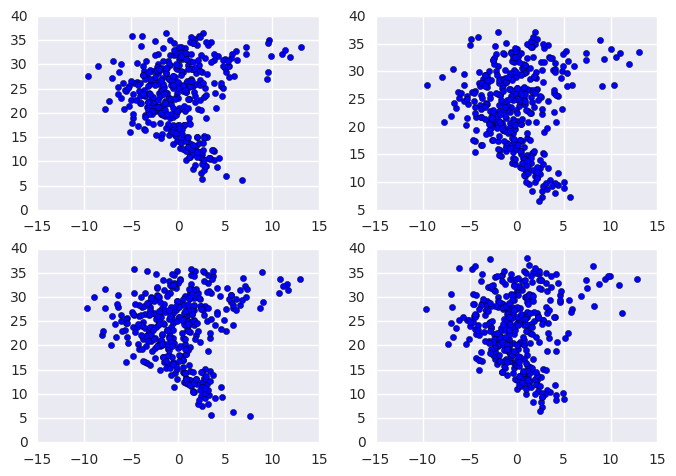

In [28]:
fig, ax= plt.subplots(2 , 2)
for i in range(4):
    if i==0:
        formula_new='+'. join([var for var in df.columns.difference(['name', 'mpg'])])
    if i==1:
        formula_new='+'. join(['np.power(' + var + ', 2)' for var in df.columns.difference(['name', 'mpg'])])
    if i==2:
        formula_new='+'. join(['np.sqrt(' + var + ')' for var in df.columns.difference(['name', 'mpg'])])
    if i==3:
        formula_new='+'. join(['np.log(' + var + ')' for var in df.columns.difference(['name', 'mpg'])])
    model_new=sm.OLS.from_formula('mpg~'+ formula_new, df)
    result_new=model_new.fit()
    result_new.summary()
    res=result_new.resid
    fv=result_new.fittedvalues
    row=i%2
    col=i/2
    ax[row, col].scatter(res, fv)
    
        


/Users/adribadri/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


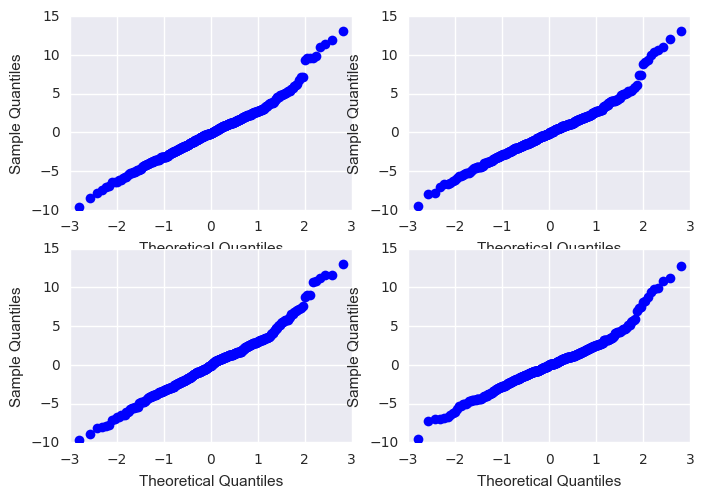

In [29]:
fig, ax= plt.subplots(2 , 2)
for i in range(4):
    if i==0:
        formula_new='+'. join([var for var in df.columns.difference(['name', 'mpg'])])
    if i==1:
        formula_new='+'. join(['np.power(' + var + ', 2)' for var in df.columns.difference(['name', 'mpg'])])
    if i==2:
        formula_new='+'. join(['np.sqrt(' + var + ')' for var in df.columns.difference(['name', 'mpg'])])
    if i==3:
        formula_new='+'. join(['np.log(' + var + ')' for var in df.columns.difference(['name', 'mpg'])])
    model_new=sm.OLS.from_formula('mpg~'+ formula_new, df)
    result_new=model_new.fit()
    result_new.summary()
    res=result_new.resid
    fv=result_new.fittedvalues
    row=i%2
    col=i/2
    sm.qqplot(res, ax=ax[row, col])

## Exercise - Use multiple regression using the `Carseats` data set.

1. Fit a multiple regression model to predict `Sales` using `Price`,
`Urban`, and `US`.

2. Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

3. Write out the model in equation form, being careful to handle
the qualitative variables properly.

4. For which of the predictors can you reject the null hypothesis
H: β = 0?

5. On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

6. How well do the models in (1) and (5) fit the data?

7. Using the model from (5), obtain 95% confidence intervals for
the coefficient(s).

8. Is there evidence of outliers or high leverage observations in the
model from (5)?

In [30]:
df_car=pd.read_csv('Carseats.csv')
df_car.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


1) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [31]:
model=sm.OLS.from_formula('Sales ~ Price + Urban + US', df_car)
result=model.fit()
result.summary()
#the R2 is quite low, only 0.239. The predictor URBAN is not significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           2.39e-23
Time:                        20:35:20   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000        11.764    14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936        -0.556     0.512
US[T.Yes]        1.2006      0.259      4.635      0.000         0.691     1.710
Price           -0.0545      0.005    -10.389      0.000        -0.065    -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

In [32]:
print("The areas with URBAN=YES have lower Sales in average with {:.3f}." . format(abs(result.params[1])))

print("The areas with US=YES have higher Sales in average with {:.3f}." . format(abs(result.params[2])))
print("If the price increases with one unit, the Sales will decrease with {:.3f} unit." . format(abs(result.params[3])))

The areas with URBAN=YES have lower Sales in average with 0.022.
The areas with US=YES have higher Sales in average with 1.201.
If the price increases with one unit, the Sales will decrease with 0.054 unit.


3) Write out the model in equation form, being careful to handle the qualitative variables properly.

In [33]:
#equation of the model
def dummy(val):
    if val=='Yes':
        return 1
    else:
        return 0

#temp=df_car[['Sales', 'Price','Urban','US']]
#temp['dummy_urban']=temp['Urban'].apply(dummy)
#temp['dummy_us']=temp['US'].apply(dummy)
#temp                       
#temp['fv']=result.params[0]+result.params[3]*temp['Price'] + result.params[1]*temp['dummy_urban'] + result.params[2]*temp['dummy_us']

print('Sales = ' + str(result.params[0]) + '+' + str(result.params[3]) + '* Price + ' + str(result.params[1]) + '* dummy_urban +' + str(result.params[2]) + '* dummy_us + error')    

Sales = 13.0434689368+-0.0544588491776* Price + -0.0219161508141* dummy_urban +1.20057269779* dummy_us + error


4) For which of the predictors can you reject the null hypothesis H: β = 0?

In [34]:
print("The pvalue if the Price and the US variables are lower than 0.05, we can reject the H0: the coeffeicients are significantly geater than 0.") 

The pvalue if the Price and the US variables are lower than 0.05, we can reject the H0: the coeffeicients are significantly geater than 0.


5) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [35]:
result_new=sm.OLS.from_formula('Sales ~ Price + US', df_car).fit()
result_new.summary()
#all predictors are significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           2.66e-24
Time:                        20:35:20   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000        11.790    14.271
US[T.Yes]      1.1996      0.258      4.641      0.000         0.692     1.708
Price         -0.0545      0.005    -10.416      0.000        -0.065    -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6) How well do the models in (1) and (4) fit the data ?

In [36]:
# the adjusted R2 is higher in the new model: the same R2 is achived with less variables

7) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [37]:
result_new.conf_int()

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


8) Is there evidence of outliers or high leverage observations in the model from (5) ?

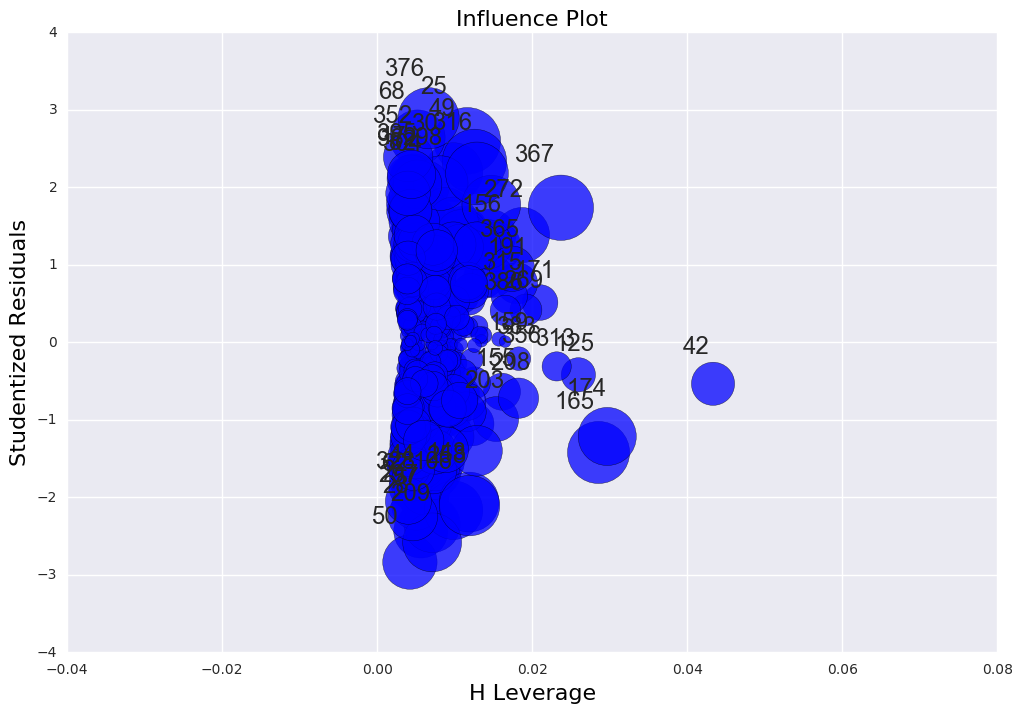

In [38]:
fig, ax=plt.subplots(figsize=(12,8))
fig= sm.graphics.influence_plot(result_new, ax=ax)
#there are couple of outliers, but these outliers have low leverage. There is one point (42) with large leverage

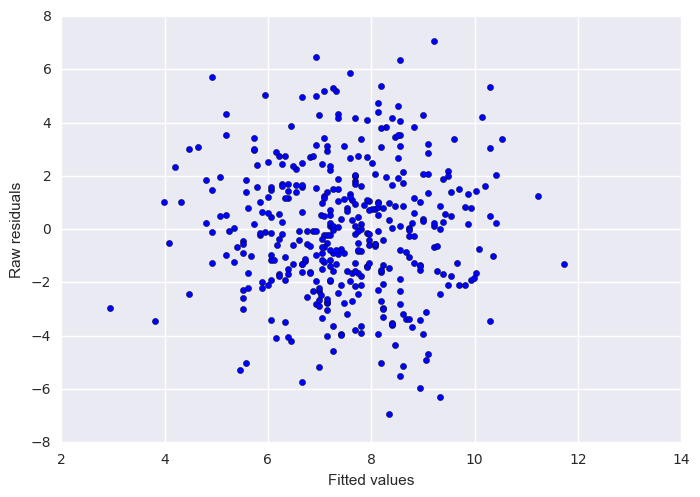

In [39]:
plt.scatter(result_new.fittedvalues, result_new.resid)
plt.ylabel('Raw residuals')
plt.xlabel('Fitted values')

In [40]:
#There residual plot looks nice, there is no attern to recognise

## Exercise - Investigate the t-statistic for the null hypothesis. 

In this problem we will investigate the t-statistic for the null hypothesis
H: β = 0 in simple linear regression without an intercept. To
begin, we generate a predictor x and a response y as follows.

    import numpy as np
    np.random.seed(1)
    x = np.random.randn(100)
    y = 2 * x + np.random.randn(100)

1. Perform a simple linear regression of y onto x, without an intercept.
Report the coefficient estimate β, the standard error of
this coefficient estimate, and the t-statistic and p-value associated
with the null hypothesis H: β = 0. Comment on these
results. (You can perform regression without an intercept)

2. Now perform a simple linear regression of x onto y without an
intercept, and report the coefficient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H: β = 0. Comment on these results.

3. What is the relationship between the results obtained in (1) and
(2)?

4. For the regrssion of Y onto X without an intercept, the t-statistic for H0:β=0 takes the form β^/SE(β^), where β^ is given by (3.38), and where


$$SE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^n(y_i - x_i\hat{\beta})^2}{(n - 1)\sum_{i=1}^nx_i^2}}$$

*Confirm numerically in Python, that the t-statistic can be written as*

$$\frac{\sqrt{n - 1}\sum_{i=1}^nx_iy_i}{\sqrt{(\sum_{i=1}^nx_i^2)(\sum_{i=1}^ny_i^2) - (\sum_{i=1}^nx_iy_i)}}$$

'5. Using the results from (4), argue that the t-statistic for the regression of y onto x is the same t-statistic for the regression of x onto y.

'6. In Python, show that when regression is performed with an intercept, the t-statistic for H0:β1=0 is the same for the regression of y onto x as it is the regression of x onto y.

In [41]:
import numpy as np
np.random.seed(1)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)

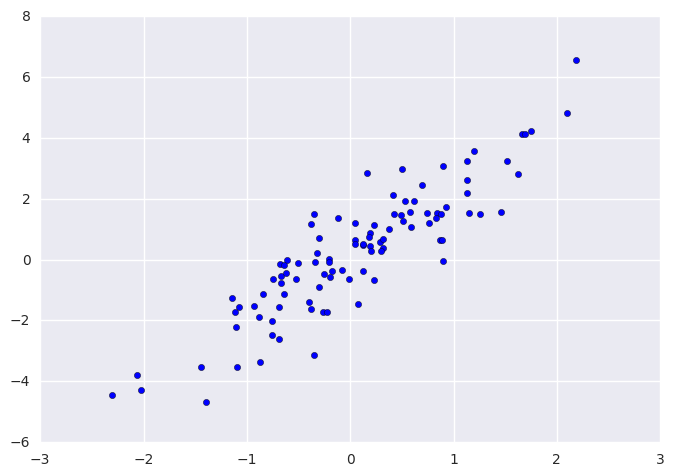

In [42]:
plt.scatter(x,y)

1) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate β^, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0. Comment on these results.

In [43]:
result_xy=sm.OLS(y,x).fit()
result_xy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           3.46e-36
Time:                        20:35:22   Log-Likelihood:                -135.67
No. Observations:                 100   AIC:                             273.3
Df Residuals:                      99   BIC:                             275.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000         1.896     2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
print("The coefficient estimate β is {:.3f}, that means if there is a unit change in x, the y will increase by {:.3f} unit.".format(result_xy.params[0],result_xy.params[0]))
print("The standard error of this coefficient estimate is  {:.3f}." .format(result_xy.bse[0]))
print("The t-statistic associated with the null hypothesis H0 is {:.3f}." . format(result_xy.tvalues[0]))
print("The p-value associated with the null hypothesis H0 is {:.3f}." . format(result_xy.pvalues[0]))

The coefficient estimate β is 2.107, that means if there is a unit change in x, the y will increase by 2.107 unit.
The standard error of this coefficient estimate is  0.106.
The t-statistic associated with the null hypothesis H0 is 19.792.
The p-value associated with the null hypothesis H0 is 0.000.


2) Now perform a simple linear regression of x onto y, without an intercept. Report the coefficient estimate β^, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0. Comment on these results.

In [45]:
result_yx=sm.OLS(x,y).fit()
result_yx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           3.46e-36
Time:                        20:35:22   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000         0.341     0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
print("The coefficient estimate β is {:.3f}, that means if there is a unit change in y, the x will increase by {:.3f} unit.".format(result_yx.params[0],result_yx.params[0]))
print("The standard error of this coefficient estimate is  {:.3f}." .format(result_yx.bse[0]))
print("The t-statistic associated with the null hypothesis H0 is {:.3f}." . format(result_yx.tvalues[0]))
print("The p-value associated with the null hypothesis H0 is {:.3f}." . format(result_yx.pvalues[0]))

The coefficient estimate β is 0.379, that means if there is a unit change in y, the x will increase by 0.379 unit.
The standard error of this coefficient estimate is  0.019.
The t-statistic associated with the null hypothesis H0 is 19.792.
The p-value associated with the null hypothesis H0 is 0.000.


3) What is the relationship between the results obtained in (1) and (2)?

In [47]:
# The R2, t-statistics and F-statistics have the same value in the two models

4) For the regrssion of Y onto X without an intercept, the t-statistic for H0:β=0 takes the form β^/SE(β^), where β^ is given by (3.38), and where

$$SE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^n(y_i - x_i\hat{\beta})^2}{(n - 1)\sum_{i=1}^nx_i^2}}$$

Show algebraically, and confirm numerically in Python, that the t-statistic can be written as 

$$\frac{\sqrt{n - 1}\sum_{i=1}^nx_iy_i}{\sqrt{(\sum_{i=1}^nx_i^2)(\sum_{i=1}^ny_i^2) - (\sum_{i=1}^nx_iy_i)}}$$

We have

$$t = \frac{\sum_ix_iy_y/\sum_jx_j^2}{\sqrt{\sum_i(y_i - x_i\hat{\beta})^2/(n - 1)\sum_jx_j^2}} = \frac{\sqrt{n - 1}\sum_ix_iy_i}{\sqrt{\sum_jx_j^2\sum_i(y_i - x_i\sum_jx_jy_j/\sum_jx_j^2)^2}} = \frac{\sqrt{n - 1}\sum_ix_iy_i}{\sqrt{(\sum_jx_j^2)(\sum_jy_j^2) - (\sum_jx_jy_j)^2}}$$

Now let’s verify this result numerically.

In [48]:
#According to the equation, it doesnt matter with parameter is x and which is y, the t-statistics has the same result
def tstat(col1, col2):
    n=len(col1)
    t=np.sqrt(n-1)*np.sum(np.dot(col1,col2))/np.sqrt(np.sum(np.square(col1))*np.sum(np.square(col2))- np.sum(np.dot(col1,col2))**2)
    return t
tstat(x,y)

19.791801987091205

5) Using the results from (4), argue that the t-statistic for the regression of y onto x is the same t-statistic for the regression of x onto y.

In [49]:
tstat(y,x)

19.791801987091205

6) In Python, show that when regression is performed with an intercept, the t-statistic for H0:β1=0 is the same for the regression of y onto x as it is the regression of x onto y.

In [50]:
# Since in the example the mean of x and the mean of y are 0, it can be shown easily algerically
x_withc=sm.add_constant(x)
result=sm.OLS(y,x_withc).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           5.39e-36
Time:                        20:35:23   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1470      0.094      1.564      0.121        -0.039     0.334
x1             2.0954      0.106     19.783      0.000         1.885     2.306
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
y_withc=sm.add_constant(y)
result=sm.OLS(x, y_withc).fit()
result.summary()
#both the tstatistics is 19.783

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           5.39e-36
Time:                        20:35:23   Log-Likelihood:                -49.289
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0440      0.040     -1.090      0.279        -0.124     0.036
x1             0.3817      0.019     19.783      0.000         0.343     0.420
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.611
Skew:                           0.118   Prob(JB):                        0.737
Kurtosis:                       2.698   Cond. No.                         2.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercise - Explore linear regression without an intercept. 

1. Recall that the coefficient estimate β^ for the linear regression of Y onto X witout an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X ?

1. Generate an example in Python with n = 100 observations in which
the coefficient estimate for the regression of X onto Y is different
from the coefficient estimate for the regression of Y onto X.

1. Generate an example in Python with n = 100 observations in which
the coefficient estimate for the regression of X onto Y is the
same as the coefficient estimate for the regression of Y onto X.

1) Recall that the coefficient estimate β^ for the linear regression of Y onto X witout an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

The coefficient estimate for the regression of Y onto X is

$$\hat{\beta} = \frac{\sum_ix_iy_i}{\sum_jx_j^2}$$

The coefficient estimate for the regression of X onto Y is

$$\hat{\beta}' = \frac{\sum_ix_iy_i}{\sum_jy_j^2}$$

The coefficients are the same iff $\sum_jx_j^2 = \sum_jy_j^2$

2) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

In [52]:
#This is the same constellation as by the prevous exercise
np.random.seed(123)
x=np.random.randn(100)
y=4*x + np.random.randn(100)

In [53]:
np.sum(x**2)

127.36614610898367

In [54]:
np.sum(y**2)

2114.6763512417879

In [55]:
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     2126.
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           1.01e-68
Time:                        20:35:23   Log-Likelihood:                -138.85
No. Observations:                 100   AIC:                             279.7
Df Residuals:                      99   BIC:                             282.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.9830      0.086     46.106      0.000         3.812     4.154
==============================================================================
Omnibus:                        5.024   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.127
Skew:                          -0.308   Prob(JB):                       0.0770
Kurtosis:                       3.923   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
result=sm.OLS(x, y).fit()
result.summary()
#The coefficients differ from each other, but the t-statistics is the same

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     2126.
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           1.01e-68
Time:                        20:35:23   Log-Likelihood:                 1.6254
No. Observations:                 100   AIC:                            -1.251
Df Residuals:                      99   BIC:                             1.354
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.2399      0.005     46.106      0.000         0.230     0.250
==============================================================================
Omnibus:                        5.555   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                6.077
Skew:                           0.311   Prob(JB):                       0.0479
Kurtosis:                       4.036   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

In [57]:
#if we take the same values with positive and negative sign, the sqare of the coefficiants will be the same
np.random.seed(123)
x=np.arange(-100,1)
y=np.arange(0,101)

In [58]:
np.sum(y**2)

338350

In [59]:
np.sum(x**2)

338350

In [60]:
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     32.03
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           1.45e-07
Time:                        20:35:23   Log-Likelihood:                -539.18
No. Observations:                 101   AIC:                             1080.
Df Residuals:                     100   BIC:                             1083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.4925      0.087     -5.659      0.000        -0.665    -0.320
==============================================================================
Omnibus:                       34.133   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.062
Skew:                           0.000   Prob(JB):                       0.0483
Kurtosis:                       1.800   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
result=sm.OLS(x, y).fit()
result.summary()
#The coefficients differ from each other, but the t-statistics is the same

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     32.03
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           1.45e-07
Time:                        20:35:23   Log-Likelihood:                -539.18
No. Observations:                 101   AIC:                             1080.
Df Residuals:                     100   BIC:                             1083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.4925      0.087     -5.659      0.000        -0.665    -0.320
==============================================================================
Omnibus:                       34.133   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.062
Skew:                           0.000   Prob(JB):                       0.0483
Kurtosis:                       1.800   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercise - Explore linear regression with simulated data.

In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to set the seed prior to
starting part (1) to ensure consistent results.

1. Create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X. 

2. Create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

3. Using x and eps, generate a vector y according to the model 

> Y = −1 + 0.5X + e

What is the length of the vector `y`? What are the values of β0 and β1 in this linear model?

4. Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.

5. Fit a least squares linear model to predict y using `x`. Comment
on the model obtained. How do β0 and β1 compare to β0 and
β1?

6. Display the least squares line on the scatterplot obtained in (4).
Draw the population regression line on the plot, in a different
color. Create an appropriate legend.

7. Now fit a polynomial regression model that predicts `y` using `x`
and `x^2`. Is there evidence that the quadratic term improves the
model fit? Explain your answer.

8. Repeat (1)–(6) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the variance
of the normal distribution used to generate the error term
`e` in (2). Describe your results.

9. Repeat (1)–(6) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term  in (b). Describe your results.

10. What are the confidence intervals for β0 and β1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

In [62]:
np.random.seed(1)

1) Create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X. 

In [63]:
X=np.random.randn(100)

2) Create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

In [64]:
eps=0.25 * np.random.randn(100) + 0

3) Using x and eps, generate a vector y according to the model

    Y = −1 + 0.5X + e

What is the length of the vector y? What are the values of β0 and β1 in this linear model?

In [65]:
Y= -1 +0.5*X + eps
#the β0 is -1 and β1 is 0.5
len(Y)

100

4) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

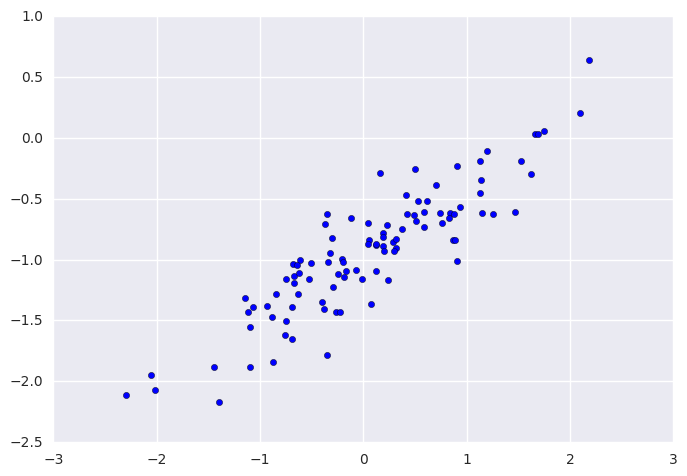

In [66]:
plt.scatter(X,Y)
#the datapoints lie on a line with intercept -1 and slope 0.5

5) Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do β^0 and β^1 compare to β0 and β1?

In [67]:
result=sm.OLS(Y, sm.add_constant(X)).fit()
result.summary()
#The estimated parameters are close to β0 and β1, the real values of β0 and β1 lie in the confidence interval of the estimations

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           5.39e-36
Time:                        20:35:23   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.9632      0.023    -40.999      0.000        -1.010    -0.917
x1             0.5239      0.026     19.783      0.000         0.471     0.576
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6) Display the least squares line on the scatterplot obtained in (4). Draw the population regression line on the plot, in a different color. Use the legend() function to create an appropriate legend.

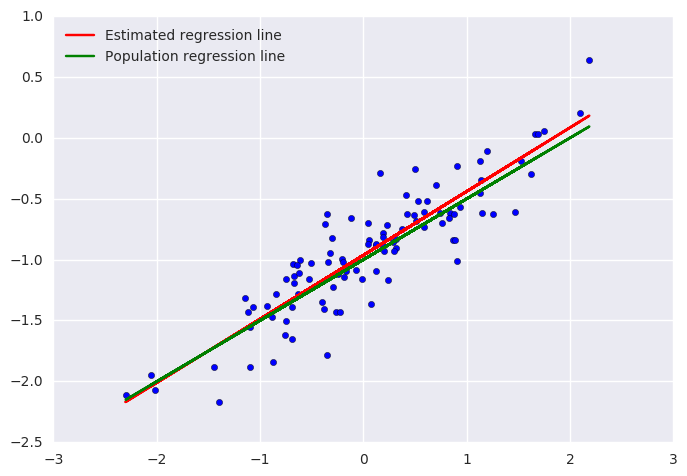

In [68]:
plt.scatter(X,Y)
plt.plot(X, result.fittedvalues, c='r', label='Estimated regression line')
plt.plot(X, -1 +0.5*X , c='g', label='Population regression line')
plt.legend(loc='upper left')


7) Now fit a polynomial regression model that predicts y using x and $x^2$. Is there evidence that the quadratic term improves the model fit ? Explain your answer.

In [69]:
X2=np.column_stack((np.ones(100), X, X**2))
result_x2=sm.OLS( Y, X2).fit()
result_x2.summary()
#the quadraticterm doesn't improve the model fit, the pvalue is larger than 0.05 
#the adjusted R2 decreased, because we involved one more parameter in the model which doesn't really improve the fir (same R2)
#In the population model there is no quadratic term, so it is the result we were expecting

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           1.32e-34
Time:                        20:35:24   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.9663      0.029    -33.486      0.000        -1.024    -0.909
x1             0.5234      0.027     19.582      0.000         0.470     0.576
x2             0.0039      0.021      0.181      0.856        -0.038     0.046
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

8) Repeat (1)-(6) after modifying the data generation process in such a way that there is less noise in the data. The initial model should remain the same. Describe your results.

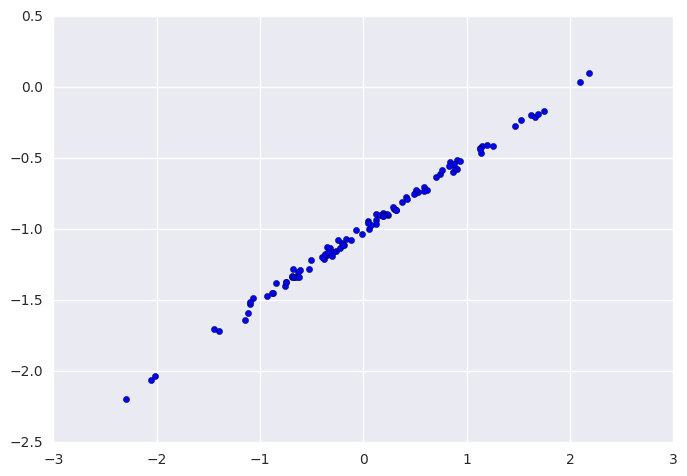

In [70]:
eps=0.025 * np.random.randn(100)
Y= -1 +0.5*X + eps
plt.scatter(X,Y)
#I reduced the variance of the noise
#the points are closer to the line with slope 0.5 and intercept -1

In [71]:
result_ls=sm.OLS(Y, sm.add_constant(X)).fit()
result_ls.summary()
#the R2 is larger, realy close to one, and the estimated parameters are also closer to the real values. (The confidence interval of the coefficient is also smaller)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.033e+04
Date:                Tue, 11 Jul 2017   Prob (F-statistic):          6.27e-124
Time:                        20:35:24   Log-Likelihood:                 226.57
No. Observations:                 100   AIC:                            -449.1
Df Residuals:                      98   BIC:                            -443.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.9997      0.003   -393.251      0.000        -1.005    -0.995
x1             0.4990      0.003    174.147      0.000         0.493     0.505
==============================================================================
Omnibus:                        0.264   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.398
Skew:                           0.107   Prob(JB):                        0.820
Kurtosis:                       2.776   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

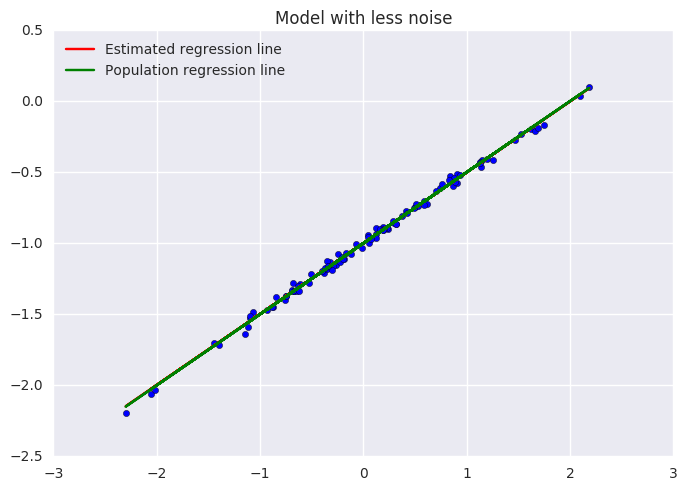

In [72]:
plt.scatter(X,Y)
plt.plot(X, result_ls.fittedvalues, c='r', label='Estimated regression line')
plt.plot(X, -1 +0.5*X , c='g', label='Population regression line')
plt.legend(loc='upper left')
plt.title('Model with less noise')
#the estimated and population regression line are almost the same

9) Repeat (1)-(6) after modifying the data generation process in such a way that there is more noise in the data. The initial model should remain the same. Describe your results.

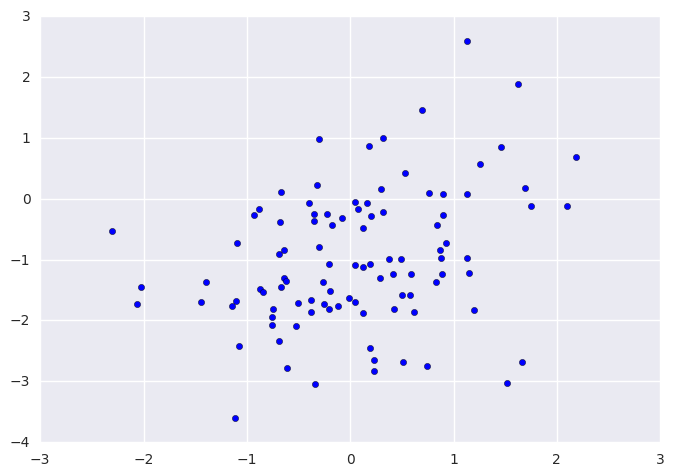

In [73]:
eps=np.random.randn(100)
Y= -1 +0.5*X + eps
plt.scatter(X,Y)
#I increased the variance of the noise
#the datapoints are more scattered

In [74]:
result_mn=sm.OLS(Y, sm.add_constant(X)).fit()
result_mn.summary()
#the R2 is smaller,  and the estimated parameters are not so close to the real values now. (The confidence interval of the coefficient became larger as well)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     10.62
Date:                Tue, 11 Jul 2017   Prob (F-statistic):            0.00154
Time:                        20:35:25   Log-Likelihood:                -147.75
No. Observations:                 100   AIC:                             299.5
Df Residuals:                      98   BIC:                             304.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.0140      0.107     -9.445      0.000        -1.227    -0.801
x1             0.3943      0.121      3.259      0.002         0.154     0.634
==============================================================================
Omnibus:                        0.673   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.286
Skew:                           0.080   Prob(JB):                        0.867
Kurtosis:                       3.207   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

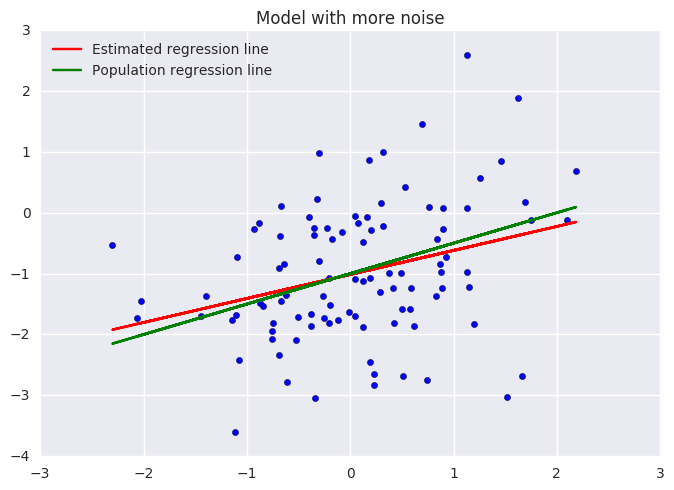

In [75]:
plt.scatter(X,Y)
plt.plot(X, result_mn.fittedvalues, c='r', label='Estimated regression line')
plt.plot(X, -1 +0.5*X , c='g', label='Population regression line')
plt.legend(loc='upper left')
plt.title("Model with more noise")
#the estimated and population regression line are almost the same

10) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set ? Comment on your results.

In [76]:
ci=pd.DataFrame(result.conf_int(), columns=['Lower_CI', 'Upper_CI'], index=['Intercept','X'])
ci['Lower_CI_less_noise']=result_ls.conf_int()[:,0]
ci['Upper_CI_less_noise']=result_ls.conf_int()[:,1]
ci['Lower_CI_more_noise']=result_mn.conf_int()[:,0]
ci['Upper_CI_more_noise']=result_mn.conf_int()[:,1]
ci
# The confidence intervals are wider, as the variance is bigger in the dataset

,Lower_CI,Upper_CI,Lower_CI_less_noise,Upper_CI_less_noise,Lower_CI_more_noise,Upper_CI_more_noise
Intercept,-1.009870,-0.916623,-1.004737,-0.994648,-1.227007,-0.800916
X,0.471307,0.576407,0.493288,0.504660,0.154222,0.634472


## Exercise - Explore the problem of collinearity.

Perform the following commands:

> np.random.seed(8)

> x1 = np.random.rand(100)

> x2 = .5 * x1 + np.random.rand(100) / 10

> y = 2 + 2 * x1 + .3 * x2 + np.random.randn(100)

1. The last line corresponds to creating a linear model in which y is
a function of x1 and x2. Write out the form of the linear model.
What are the regression coefficients?

2. What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.

3. Using this data, fit a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are β0, β1, and β2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis Ho:β1 = 0? How about the null
hypothesis Ho:β2 = 0?

4. Now fit a least squares regression to predict y using only x1.
Comment on your results. Can you reject the null hypothesis
Ho: β1 = 0?

5. Now fit a least squares regression to predict y using only x2.
Comment on your results. Can you reject the null hypothesis
Ho: β1 = 0?

6. Do the results obtained in (3)–(5) contradict each other? Explain
your answer.

7. Now suppose we obtain one additional observation, which was unfortunately mismeasured.

> x1=c(x1 , 0.1)

> x2=c(x2 , 0.8)

> y=c(y,6)

Re-fit the linear models from (3) to (5) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

In [77]:
np.random.seed(8)
x1 = np.random.rand(100)
x2 = 0.5 * x1 + np.random.rand(100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.randn(100)

1) The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

In [78]:
# y= 2 + 2*x1 + 0.3*x2 + error
#coefficients are: β0=2 ; β1=2 ; β2=0.3

2) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

In [79]:
np.corrcoef(x1, x2)
#the correlation between x1 and x2 is very large: 0.98

array([[ 1.        ,  0.98220892],
       [ 0.98220892,  1.        ]])

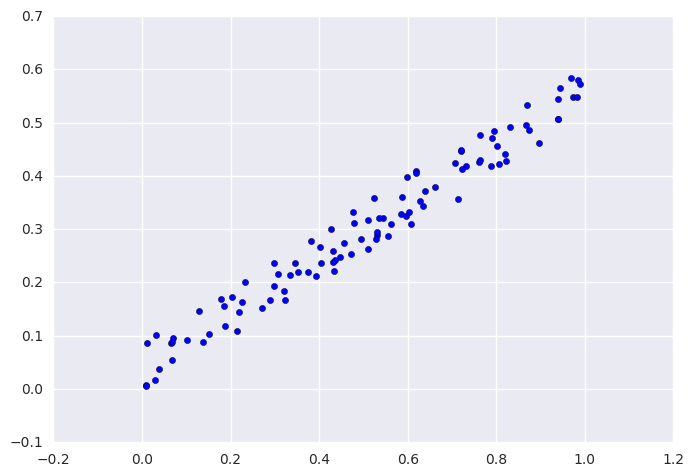

In [80]:
plt.scatter(x1, x2)

3) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are β0, β1, and β2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis Ho:β1 = 0? How about the null hypothesis Ho:β2 = 0?

In [81]:
x=np.column_stack((np.ones(100), x1, x2))
result=sm.OLS(y, x).fit()
result.summary()
#we can reject the  Ho:β1 = 0, but we accept the  Ho:β2 = 0 -> the pvalue is larger than 0.05
#The true values: intercept is close but both β1=2 and β2 are far from the real one- Confidence Interval is also very big

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     28.39
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           1.97e-10
Time:                        20:35:25   Log-Likelihood:                -141.05
No. Observations:                 100   AIC:                             288.1
Df Residuals:                      97   BIC:                             295.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.9615      0.246      7.972      0.000         1.473     2.450
x1             5.9895      1.929      3.106      0.002         2.162     9.817
x2            -6.3538      3.608     -1.761      0.081       -13.514     0.806
==============================================================================
Omnibus:                        0.049   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.034
Skew:                          -0.031   Prob(JB):                        0.983
Kurtosis:                       2.936   Cond. No.                         47.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4) Now fit a least squares regression to predict `y` using only `x1`. Comment on your results. Can you reject the null hypothesis H0:β1=0 ?

In [82]:
result_x1=sm.OLS(y, sm.add_constant(x1)).fit()
result_x1.summary()
#we can reject the  Ho:β1 = 0, intercept and β1 are both significant
#The  estimates of the parameters are also closer to the true values , and the confidence interval is smaller

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     52.54
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           9.79e-11
Time:                        20:35:25   Log-Likelihood:                -142.62
No. Observations:                 100   AIC:                             289.2
Df Residuals:                      98   BIC:                             294.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.7327      0.211      8.204      0.000         1.314     2.152
x1             2.6533      0.366      7.249      0.000         1.927     3.380
==============================================================================
Omnibus:                        0.152   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.927   Jarque-Bera (JB):                0.237
Skew:                          -0.089   Prob(JB):                        0.888
Kurtosis:                       2.841   Cond. No.                         4.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis Ho: β1 = 0?

In [83]:
result_x2=sm.OLS(y, sm.add_constant(x2)).fit()
result_x2.summary()
#we can reject the  Ho:β1 = 0, intercept and β1 are both significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     43.31
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           2.32e-09
Time:                        20:35:25   Log-Likelihood:                -145.79
No. Observations:                 100   AIC:                             295.6
Df Residuals:                      98   BIC:                             300.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.6721      0.238      7.039      0.000         1.201     2.144
x1             4.6508      0.707      6.581      0.000         3.248     6.053
==============================================================================
Omnibus:                        0.439   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.589
Skew:                          -0.125   Prob(JB):                        0.745
Kurtosis:                       2.720   Cond. No.                         7.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6) Do the results obtained in (3)–(5) contradict each other? Explain your answer.

In [84]:
# If we only include x2 in the model, the coefficient of x2 will be totally different comparing with the model with both x1 and x2
#by correlating variables (presence of the multicollinearity)it is hard to tell anything about how the variables separately prognose y
#The collinearity reduces the accuracy of the regresson coefficients, it causes the standard error to grow (decline in t-statistic)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     25.59
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           1.15e-09
Time:                        20:35:26   Log-Likelihood:                -146.68
No. Observations:                 101   AIC:                             299.4
Df Residuals:                      98   BIC:                             307.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.6307      0.231      7.063      0.0

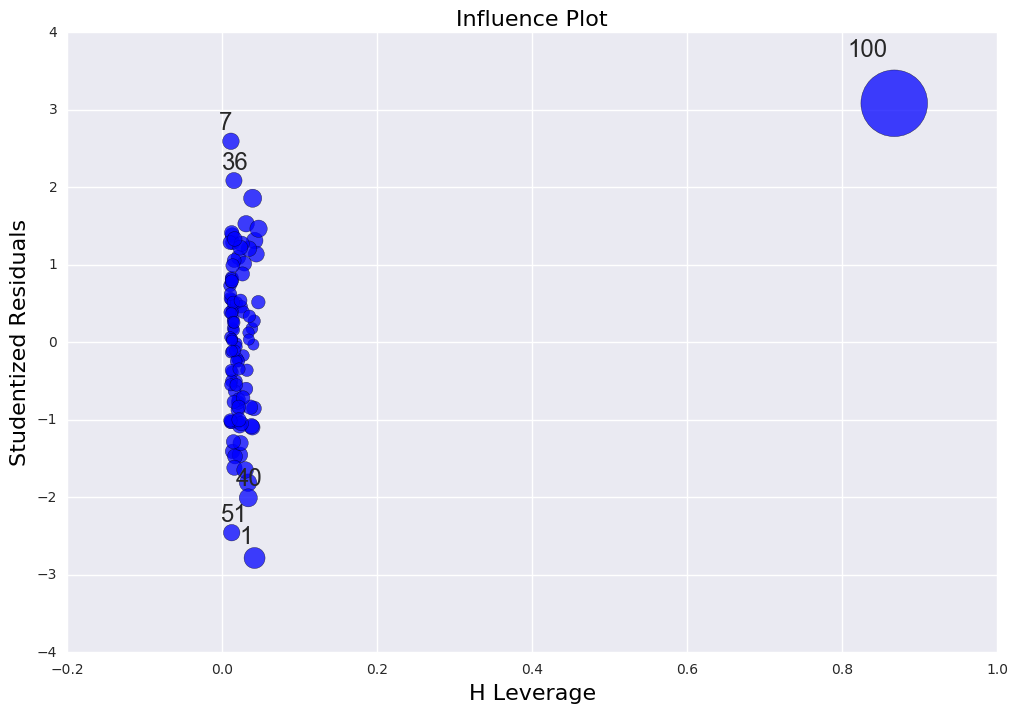

In [85]:
#7. Now suppose we obtain one additional observation, which was unfortunately mismeasured.
#Re-fit the linear models from (3) to (5) using this new data. What effect does this new observation have on the each of the models? 
#In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.
x1_new=np.append(x1 , 0.1)
x2_new=np.append(x2, 0.8)
y_new=np.append(y,6)
x_new=np.column_stack((np.ones(101), x1_new, x2_new))
result_new=sm.OLS(y_new, x_new).fit()
print(result_new.summary())

fig, ax=plt.subplots(figsize=(12,8))
fig=sm.graphics.influence_plot(result_new, ax=ax)
#it has a really big leverage point and also an outlier

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     40.06
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           7.21e-09
Time:                        20:35:26   Log-Likelihood:                -150.74
No. Observations:                 101   AIC:                             305.5
Df Residuals:                      99   BIC:                             310.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.8746      0.222      8.435      0.0

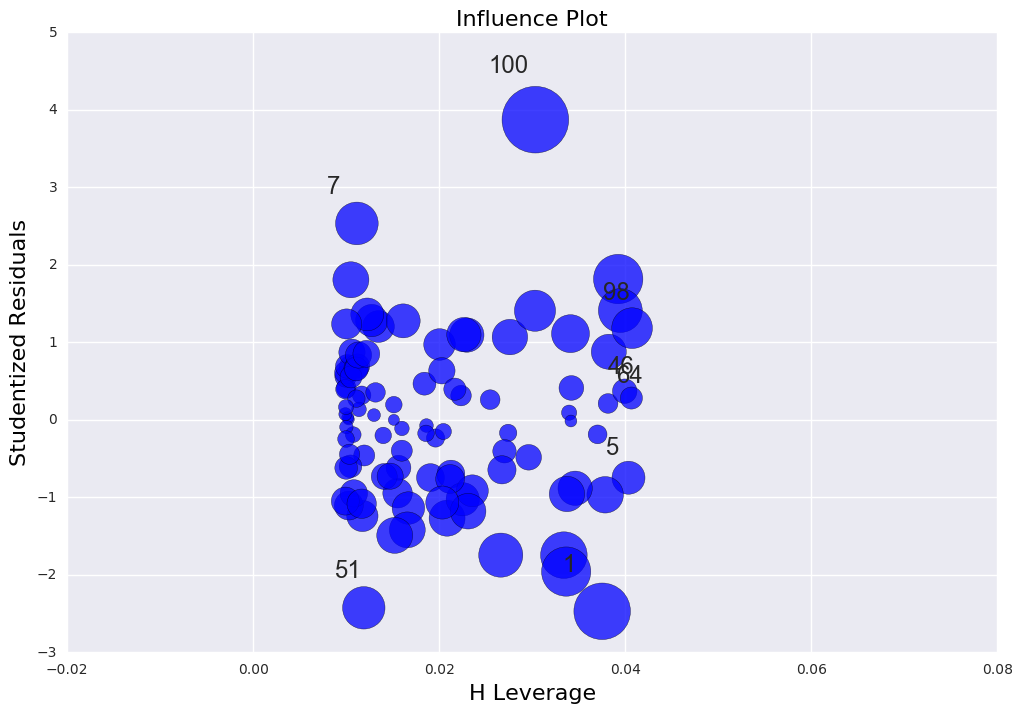

In [86]:
result_x1_new=sm.OLS(y_new, sm.add_constant(x1_new)).fit()
print(result_x1_new.summary())

fig, ax=plt.subplots(figsize=(12,8))
fig=sm.graphics.influence_plot(result_x1_new, ax=ax)
#it has a medium leverage and but a significant outlier

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     51.05
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           1.55e-10
Time:                        20:35:27   Log-Likelihood:                -146.90
No. Observations:                 101   AIC:                             297.8
Df Residuals:                      99   BIC:                             303.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.6407      0.230      7.144      0.0

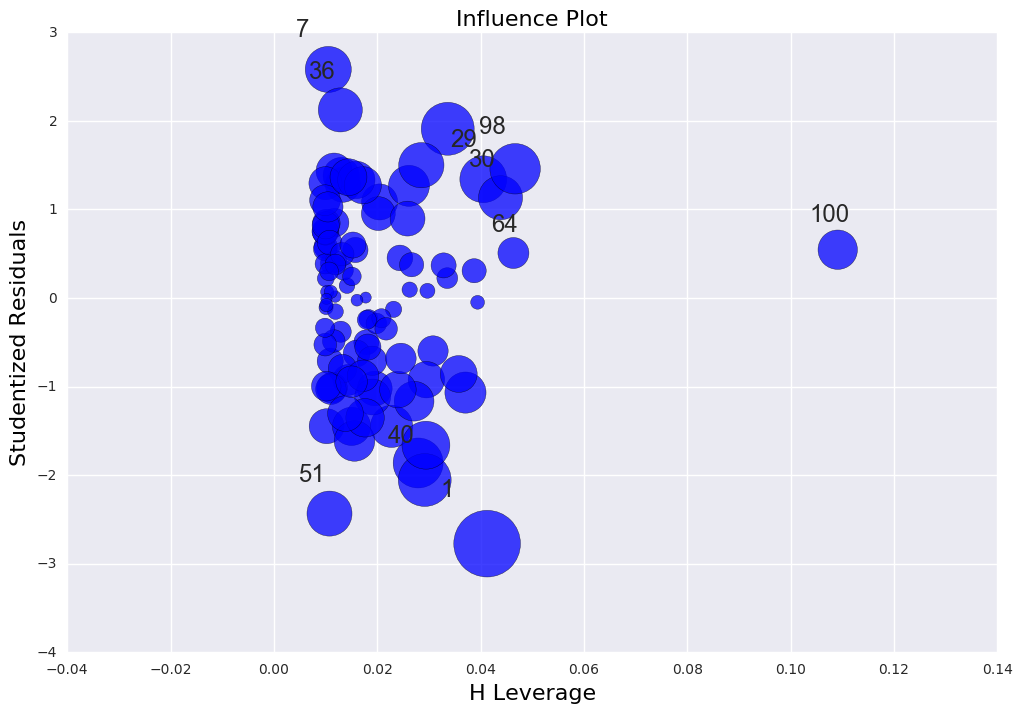

In [87]:
result_x2_new=sm.OLS(y_new, sm.add_constant(x2_new)).fit()
print(result_x2_new.summary())

fig, ax=plt.subplots(figsize=(12,8))
fig=sm.graphics.influence_plot(result_x2_new, ax=ax)
#it has a big leverage and but not an outlier

## Exercise - Predict per capita crime rate. 

This problem involves the `Boston` data set. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.

1. For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.

2. Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H: β = 0?

2. How do your results from (1) compare to your results from (2)?
Create a plot displaying the univariate regression coefficients
from (1) on the x-axis, and the multiple regression coefficients
from (2) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.

3. Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, fit a model of the form
Y = β0 + β1X + β2X^2 + β3X^3 + E.

In [88]:
boston=pd.read_csv('Boston.csv')
boston=boston.drop('Unnamed: 0', axis=1)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [89]:
boston_corr=boston.corr()
boston_corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


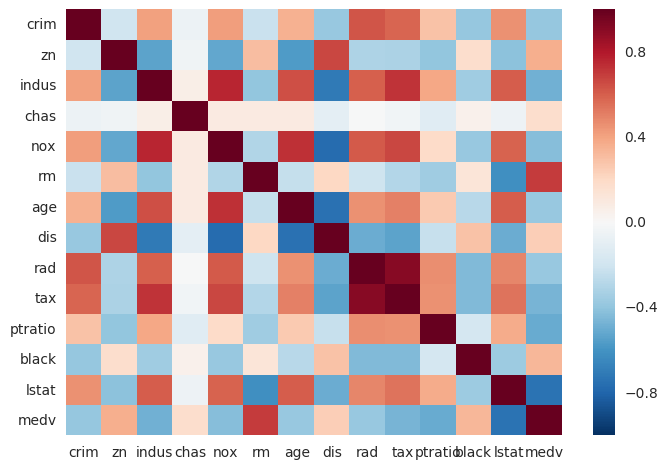

In [90]:
sns.heatmap(boston_corr)

1) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

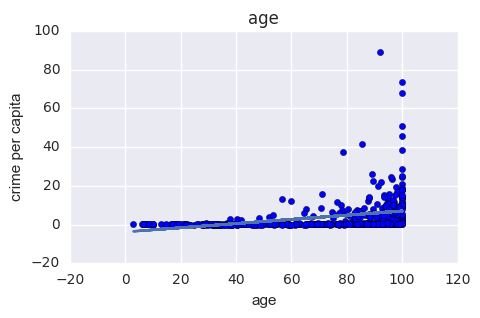

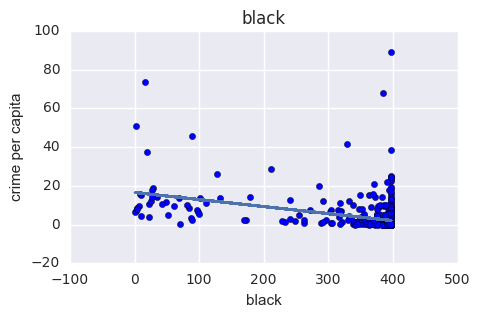

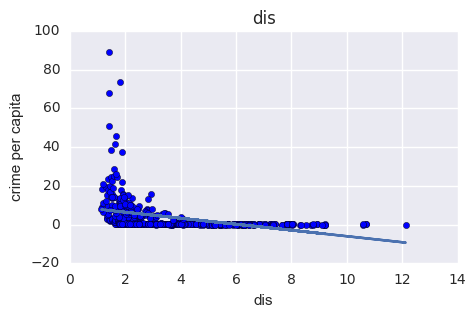

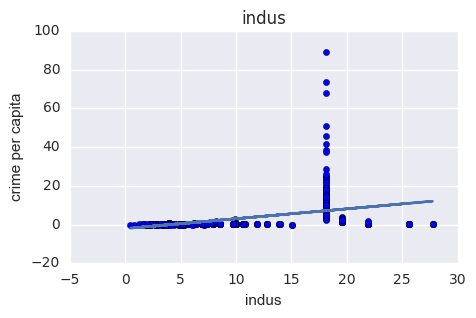

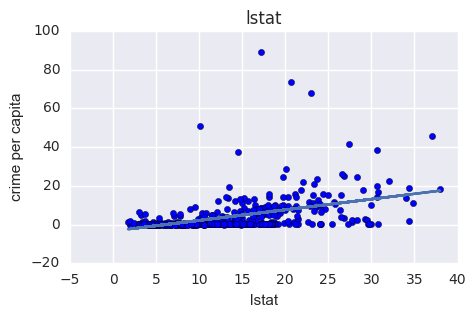

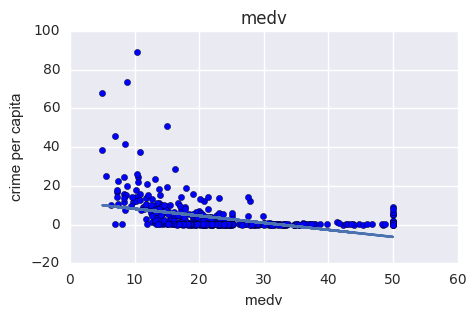

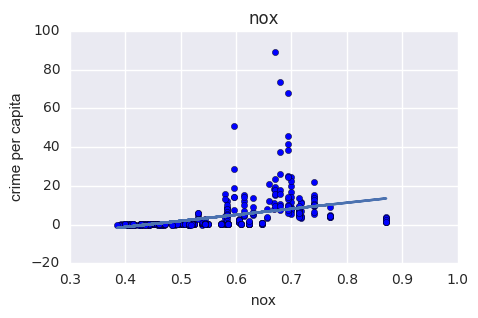

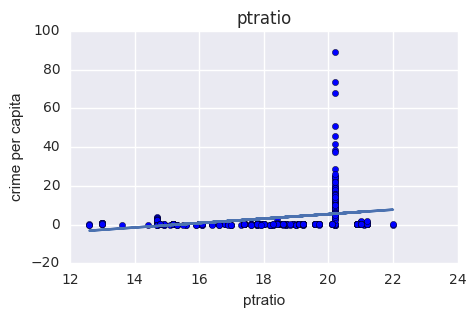

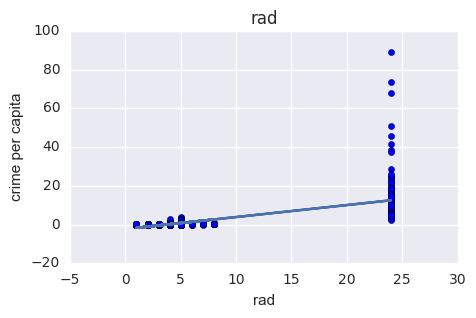

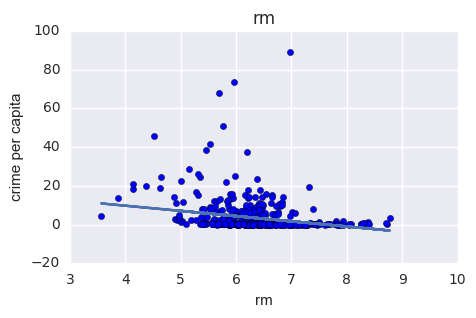

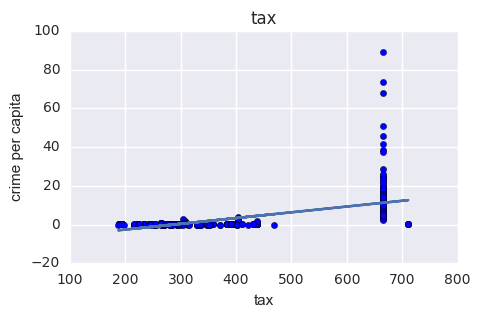

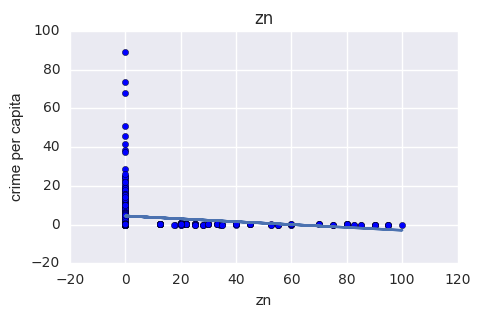

In [91]:
simple_reg={}
significant_vars=[]
predictors=boston.columns.difference(['crim'])
for i, pred in enumerate(predictors):
    result=sm.OLS.from_formula('crim ~' + pred, boston).fit()
    simple_reg[pred]=result.params[1]
    #print(result.summary())
    if result.pvalues[1]<0.05:
        significant_vars.append(pred)
        fig, ax= plt.subplots(figsize=(5,3))
        plt.scatter(boston[pred], boston['crim'])
        plt.plot(boston[pred],result.fittedvalues)
        plt.xlabel(pred)
        plt.ylabel('crime per capita')
        plt.title(pred)


In [92]:
print( 'The significant univariate predictors are:')
for pred in significant_vars:
    print(pred)


The significant univariate predictors are:
age
black
dis
indus
lstat
medv
nox
ptratio
rad
rm
tax
zn


2) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H: β = 0?

In [93]:
result_ml=sm.OLS.from_formula('crim ~' + '+'.join(boston.columns.difference(['crim'])), boston).fit()
result_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           1.57e-56
Time:                        20:35:31   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019         2.818    31.248
age            0.0015      0.018      0.081      0.935        -0.034     0.037
black         -0.0075      0.004     -2.052      0.041        -0.015    -0.000
chas          -0.7491      1.180     -0.635      0.526        -3.068     1.570
dis           -0.9872      0.282     -3.503      0.001        -1.541    -0.433
indus         -0.0639      0.083     -0.766      0.444        -0.228     0.100
lstat          0.1262      0.076      1.667      0.096        -0.023     0.275
medv          -0.1989      0.061     -3.287      0.001        -0.318    -0.080
nox          -10.3135      5.276     -1.955      0.051       -20.679     0.052
ptratio       -0.2711      0.186     -1.454      0.147        -0.637     0.095
rad            0.5882      0.088      6.680      0.000         0.415     0.761
rm             0.4301      0.613      0.702      0.483        -0.774     1.634
tax           -0.0038      0.005     -0.733      0.464        -0.014     0.006
zn             0.0449      0.019      2.394      0.017         0.008     0.082
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3) How do your results from (1) compare to your results from (2)? Create a plot displaying the univariate regression coefficients from (1) on the x-axis, and the multiple regression coefficients from (2) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [95]:
multi_reg={}
for ind in result_ml.params.index:
    multi_reg[ind]=result_ml.params[ind]
del multi_reg['Intercept']

multi_reg = sorted(multi_reg.items())
simple_reg = sorted(simple_reg.items())
index_param=[k for k, v in simple_reg]
simple_param=[v for k, v in simple_reg]
multi_param=[v for k, v in multi_reg]

param=np.column_stack([index_param, simple_param, multi_param])

param


array([['age', '0.10778622713953306', '0.0014516434361826584'],
       ['black', '-0.03627964056733076', '-0.007537504888491845'],
       ['chas', '-1.8927765508037604', '-0.7491336105105981'],
       ['dis', '-1.5509016824100992', '-0.9871757255028849'],
       ['indus', '0.5097763311042313', '-0.06385482358769845'],
       ['lstat', '0.5488047820623978', '0.12621137645949987'],
       ['medv', '-0.36315992225760296', '-0.19888682126561819'],
       ['nox', '31.2485312011229', '-10.313534912066709'],
       ['ptratio', '1.1519827870705852', '-0.2710805584722536'],
       ['rad', '0.6179109273272012', '0.5882085914734905'],
       ['rm', '-2.684051224113947', '0.4301305058640501'],
       ['tax', '0.029742252822765363', '-0.003780016384858956'],
       ['zn', '-0.07393497740412347', '0.04485521467003156']], 
      dtype='<U32')

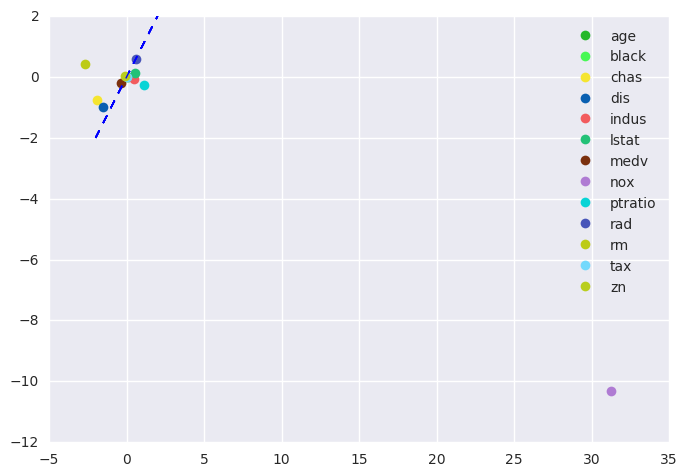

In [96]:
for i, ind in enumerate(index_param):
    c=np.random.rand(3,1)
    plt.plot(simple_param[i],multi_param[i],'o', c=c, label= ind)
    plt.plot([-2,2], [-2,2], 'b--', lw=1)
plt.legend()
# There are parameters which are close to  in both models e.g. rad. - this are on the blue line
# Predictor nox has totally different value

3) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form $Y = β0 + β1X + β2X^2 + β3X^3 + E$.

In [102]:
sign_nonlin_vars=[]
predictors=boston.columns.difference(['crim'])
for pr in predictors:
    result=sm.OLS.from_formula('crim ~' + pr+ '+ np.power(' + pr + ',2) + ' + 'np.power(' + pr + ',3)' , boston).fit()
    print(result.summary())
    if result.pvalues[2]<0.05 or result.pvalues[3]<0.05 :
        sign_nonlin_vars.append(pr)


                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     35.31
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           1.02e-20
Time:                        20:40:57   Log-Likelihood:                -1757.9
No. Observations:                 506   AIC:                             3524.
Df Residuals:                     502   BIC:                             3541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -2.5488      2.769  

In [103]:
print("By the following predictors exists evidence of non-linear association between the predictors and the response:")
for v in sign_nonlin_vars:
      print(v)

By the following predictors exists evidence of non-linear association between the predictors and the response:
age
dis
indus
medv
nox
ptratio
